In [1]:
%pip install pandas openpyxl matplotlib seaborn

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----------- ---------------------------- 2.9/9.9 MB 18.6 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.9 MB 15.2 MB/s eta 0:00:01
   -------------------------------- ------- 8.1/9.9 MB 13.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 11.8 MB/s  0:00:00
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [pandas]
   ---------- ----------------------------- 1/4 [pandas]
   ---------- ----------------------------- 1/4 [pandas]
   ------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")  # optional

In [4]:
# Path to your Excel file
file_path = "test_data.xlsx"  # change this to your actual file name

# If your data is in the first sheet
df = pd.read_excel(file_path)

# If you need a specific sheet:
# df = pd.read_excel(file_path, sheet_name="Sheet1")

# Take a quick look
df.head()

,Time,Condition,Value
0,0,Control,0.10
1,0,Treated,0.12
2,1,Control,0.20
3,1,Treated,0.35
4,2,Control,0.32


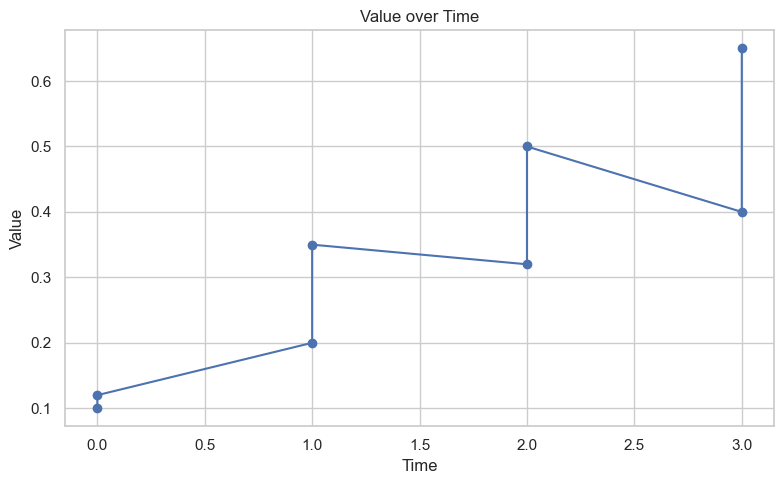

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(df["Time"], df["Value"], marker="o")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Value over Time")
plt.tight_layout()
plt.show()

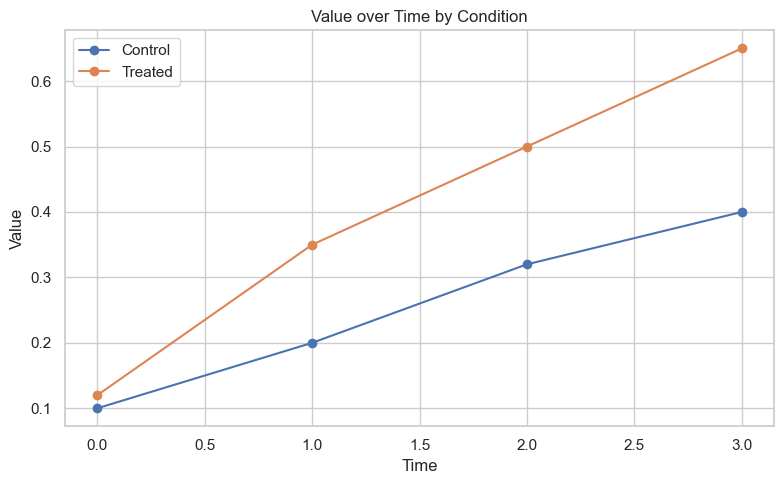

In [6]:
plt.figure(figsize=(8, 5))

for condition, sub_df in df.groupby("Condition"):
    plt.plot(sub_df["Time"], sub_df["Value"], marker="o", label=condition)

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Value over Time by Condition")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Compute means (and optionally std)
summary = df.groupby("Condition")["Value"].agg(["mean", "std"]).reset_index()
summary

,Condition,mean,std
0,Control,0.255,0.132035
1,Treated,0.405,0.226053


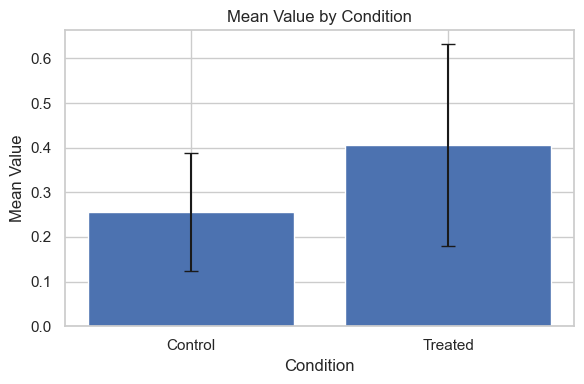

In [13]:
summary = df.groupby("Condition")["Value"].agg(["mean", "std"]).reset_index()

# Extract values
x = summary["Condition"]
y = summary["mean"]
yerr = summary["std"]

plt.figure(figsize=(6, 4))
plt.bar(x, y, yerr=yerr, capsize=5)
plt.xlabel("Condition")
plt.ylabel("Mean Value")
plt.title("Mean Value by Condition")
plt.tight_layout()
plt.show()

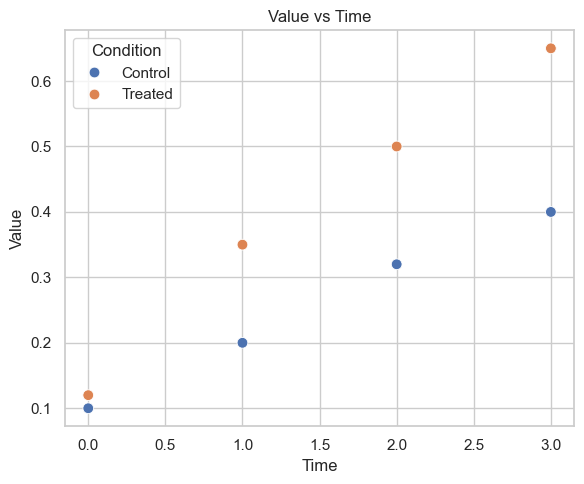

In [14]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="Time", y="Value", hue="Condition", s=60)
plt.title("Value vs Time")
plt.tight_layout()
plt.show()